In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [287]:
# loading the Dataset
dt = pd.read_csv('/content/hotel_booking.csv')

In [288]:
dt.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


In [289]:
dt.drop(['name','email','phone-number','credit_card'], axis=1, inplace=True)

In [290]:
dt.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [291]:
dt.shape

(119390, 32)

In [292]:
dt.columns # im focusing on those columns are related to problem statement

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [293]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [294]:
dt['reservation_status_date']=pd.to_datetime(dt['reservation_status_date'])

In [295]:
dt.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [296]:
for col in dt.describe(include='object').columns:
  print(col)
  print(dt[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [297]:
# checking the missing values
dt.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [298]:
# Removing agent and company (because huge missing value unable to conrtol) and we dont required these for visualization.
dt.drop(['company', 'agent'], axis=1, inplace = True)
dt.dropna(inplace = True) # will use here dropna wherever missing values in rows.

In [299]:
dt.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [300]:
dt.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

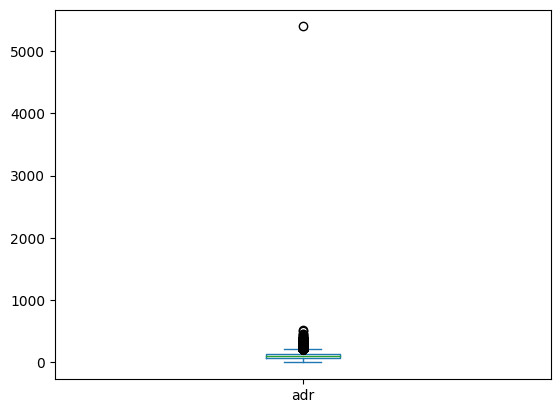

In [301]:
dt['adr'].plot(kind='box') # adr = average daily rate

In [302]:
dt = dt[dt['adr']<5000]

In [303]:
dt.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


**[Exploratory Data Analysis and Data Cleaning](https://)**


In [304]:
cancelled_per = dt['is_canceled'].value_counts(normalize = True)
cancelled_per

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

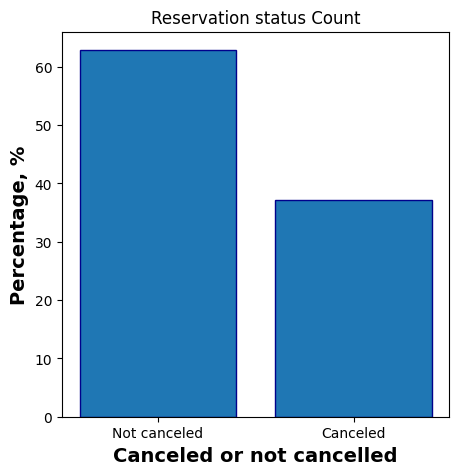

In [305]:
 plt.figure(figsize = (5,5))
 plt.title('Reservation status Count')
 plt.bar(['Not canceled', 'Canceled'], dt['is_canceled'].value_counts(normalize= True) *100, edgecolor = 'darkblue', width=0.8)
 plt.xlabel('Canceled or not cancelled', fontsize=14, weight='bold')
 plt.ylabel('Percentage, %', fontsize=14, weight = 'bold')
 plt.show()

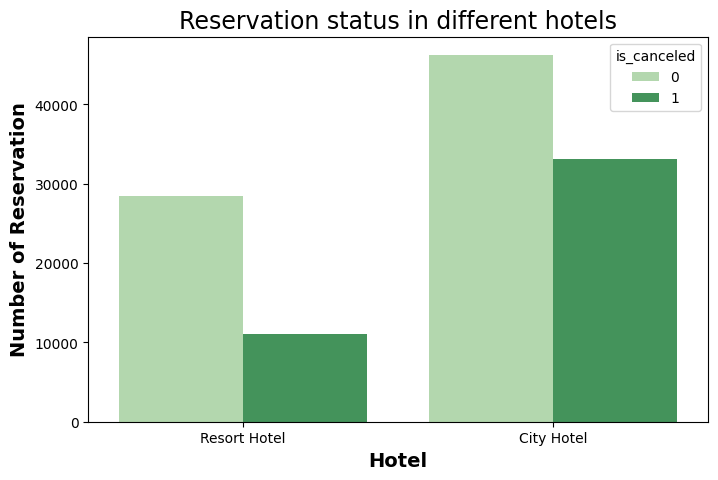

In [306]:
plt.figure(figsize = (8,5))
x_axis=sns.countplot(x = 'hotel', hue = 'is_canceled', data = dt, palette ='Greens')
plt.title('Reservation status in different hotels', size=17)
plt.xlabel('Hotel', fontsize=14, weight = 'bold')
plt.ylabel('Number of Reservation', fontsize=14, weight = 'bold')
plt.show()

In [307]:
resort_hotel = dt[dt['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)*100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

In [308]:
city_hotel = dt[dt['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

In [309]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

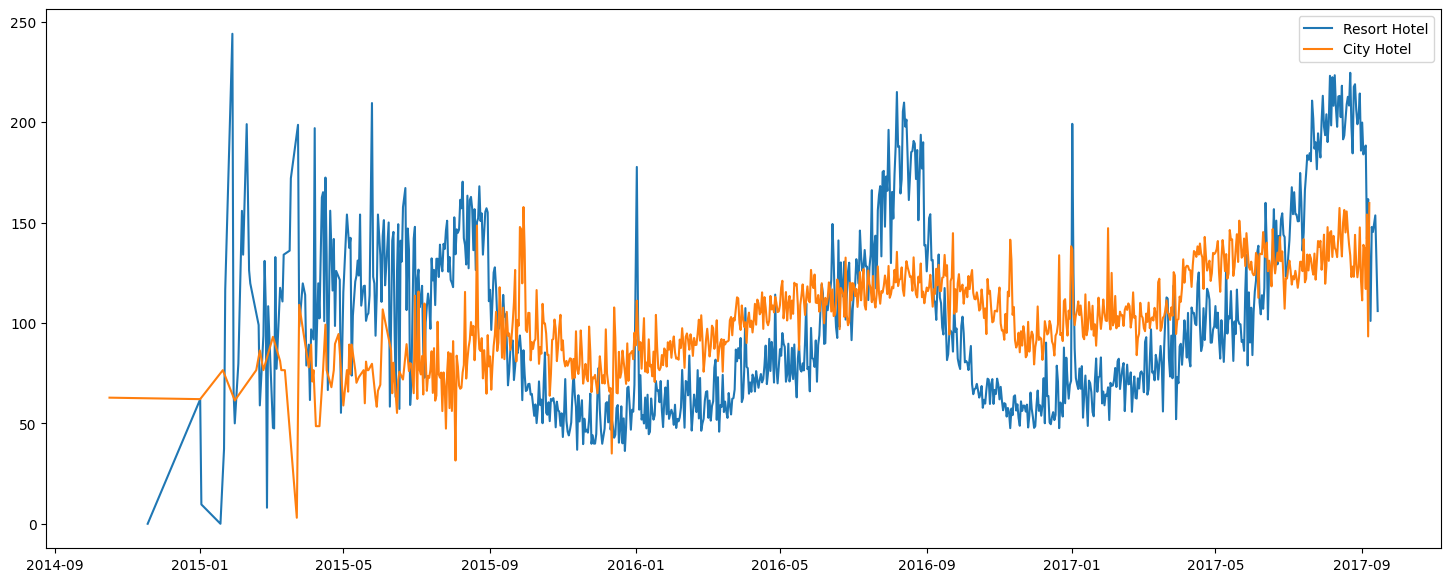

In [310]:
plt.figure(figsize = (18,7))
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 10)
plt.show()

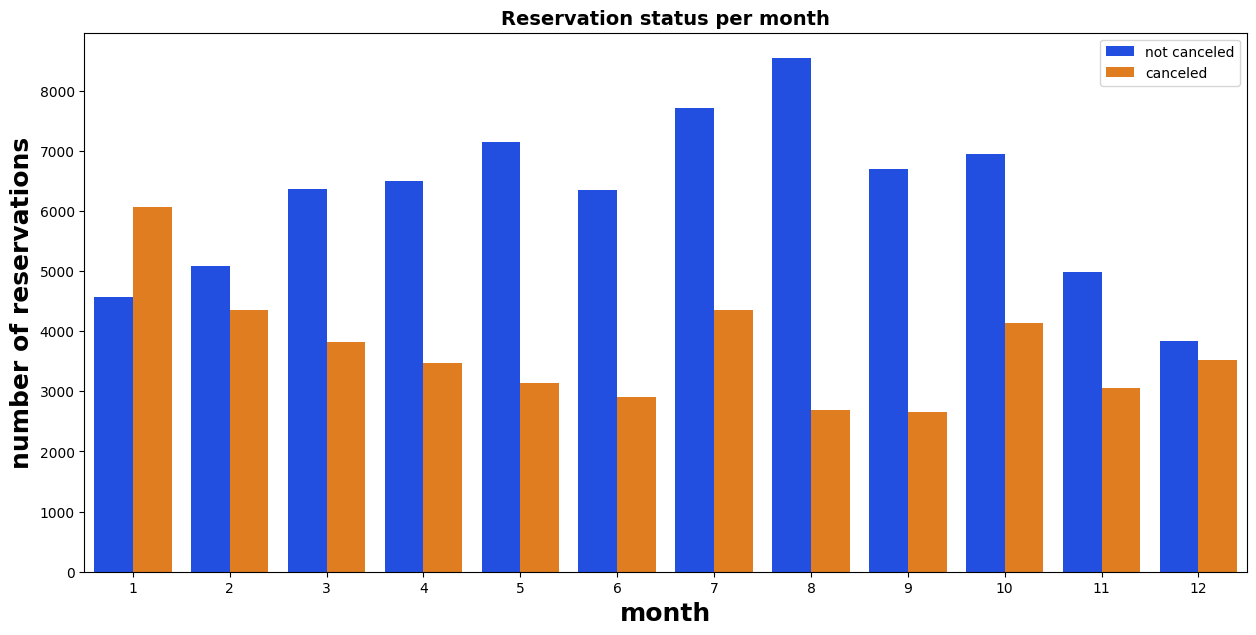

In [311]:
dt['month'] = dt['reservation_status_date'].dt.month
plt.figure(figsize = (15,7))
x_axis = sns.countplot(x = 'month', hue = 'is_canceled', data = dt, palette = 'bright')
legend_labels,_ = x_axis.get_legend_handles_labels()
x_axis.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 14, weight = 'bold')
plt.xlabel('month', fontsize = 18, weight = 'bold')
plt.ylabel('number of reservations', fontsize = 18, weight = 'bold')
plt.legend(['not canceled', 'canceled'])
plt.show()

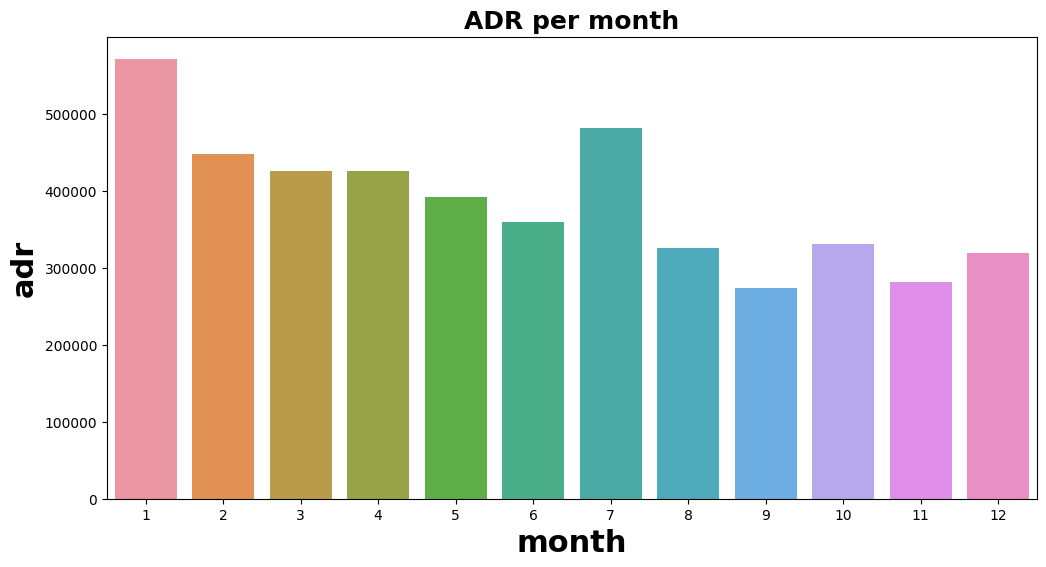

In [312]:
plt.figure(figsize = (12, 6))
plt.title('ADR per month', fontsize =18, weight = 'bold')
plt.xlabel('month', fontsize= 22, weight = 'bold')
plt.ylabel('ADR', fontsize= 22, weight = 'bold')
sns.barplot(x= 'month', y= 'adr', data = dt[dt['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

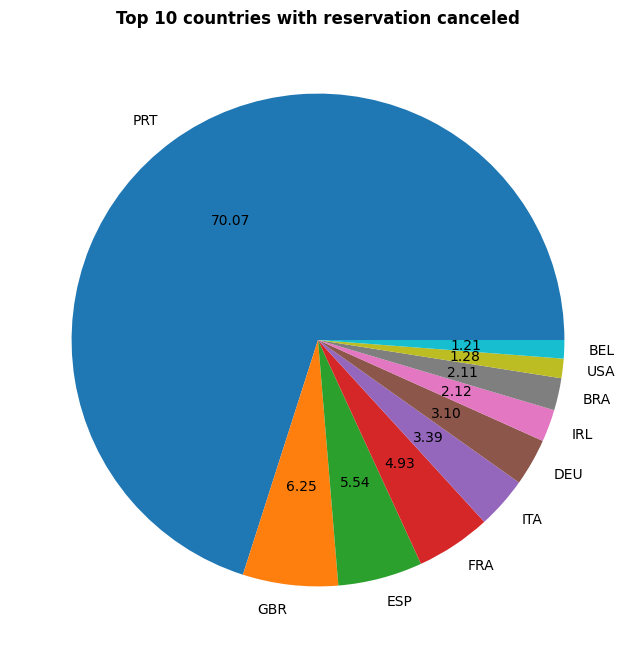

In [317]:
cancelled_data = dt[dt['is_canceled']==1]
top_10_countries = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled', weight = 'bold')
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()

In [318]:
# will see the reservation done by ofline assumption
dt['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [320]:
dt['market_segment'].value_counts(normalize = True)*100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

In [322]:
cancelled_data['market_segment'].value_counts(normalize = True)*100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

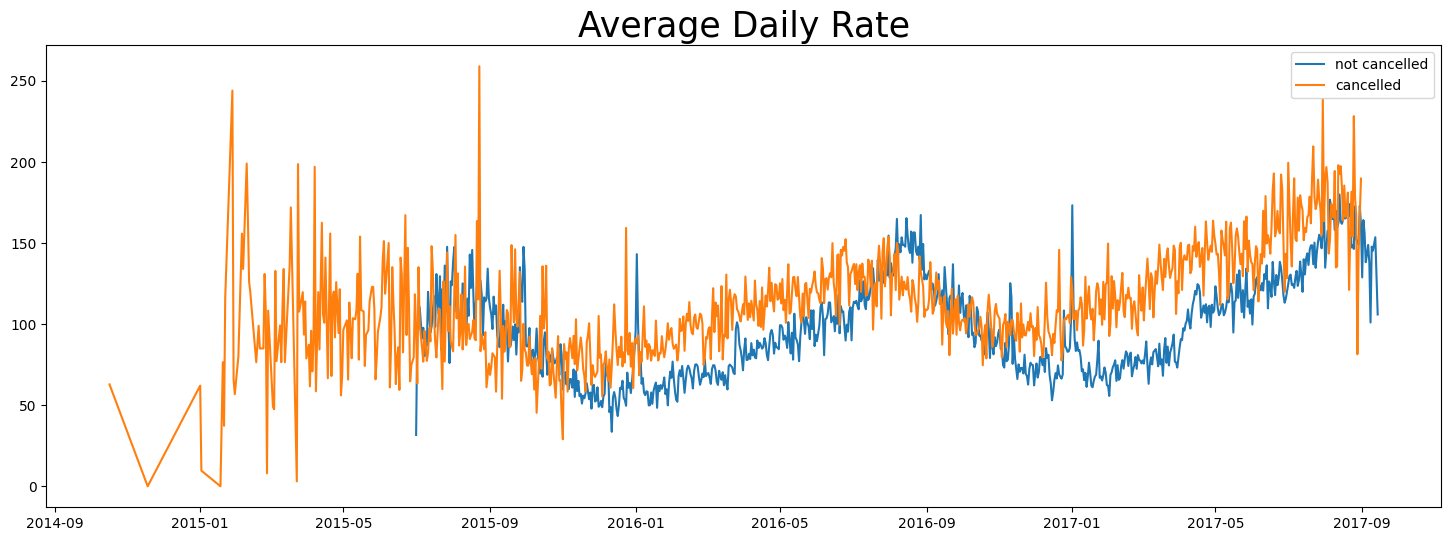

In [331]:
cancelled_dt_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_dt_adr.reset_index(inplace = True)
cancelled_dt_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = dt[dt['is_canceled'] ==0]
not_cancelled_dt_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_dt_adr.reset_index(inplace = True)
not_cancelled_dt_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (18,6))
plt.title('Average Daily Rate', size= 25)
plt.plot(not_cancelled_dt_adr['reservation_status_date'], not_cancelled_dt_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_dt_adr['reservation_status_date'], cancelled_dt_adr['adr'], label = 'cancelled')
plt.legend()


In [332]:
cancelled_dt_adr = cancelled_dt_adr[(cancelled_dt_adr['reservation_status_date']>'2016') & (cancelled_dt_adr['reservation_status_date']<'2017-09')]
not_cancelled_dt_adr = not_cancelled_dt_adr[(not_cancelled_dt_adr['reservation_status_date']>'2016') & (not_cancelled_dt_adr['reservation_status_date']<'2017-09')]

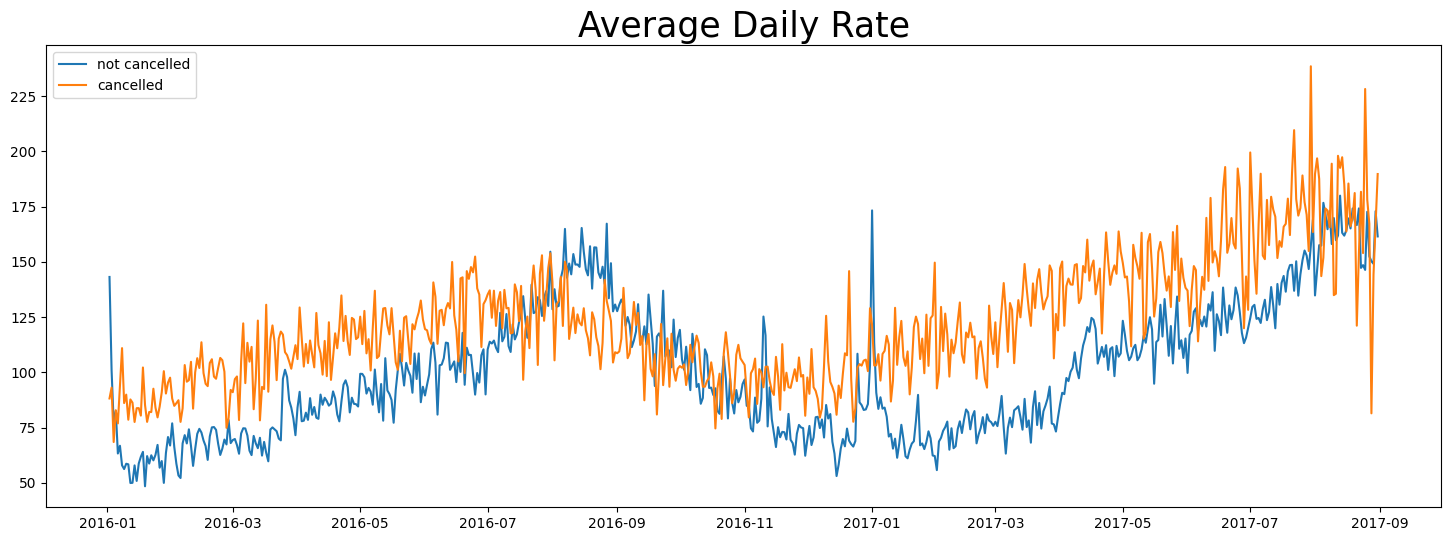

In [337]:
plt.figure(figsize = (18,6))
plt.title('Average Daily Rate', size= 25)
plt.plot(not_cancelled_dt_adr['reservation_status_date'], not_cancelled_dt_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_dt_adr['reservation_status_date'], cancelled_dt_adr['adr'], label = 'cancelled')
plt.legend()